In [ ]:
###############################################################################
###############################################################################
#***************DATA PREPARATION AND CLEANING**********************************
###############################################################################
###############################################################################


import pandas as pd
import numpy as np



df = pd.read_excel('2010to2018.xlsx')

#print the column names
print (df.columns)
df.head()
df.tail()
df.isna()

#delete columns NA or invalid data
df=df.dropna(how='all', axis=1)
#df2=df1.drop(df1.index[33266:35969], inplace=False)


#new columns names
dffinal = df.rename(columns={'Unnamed: 0': 'Date', 'Unnamed: 1': 'flightN','Unnamed: 3': 'AircraftType','Unnamed: 4': 'AircraftReg','Unnamed: 5':'OperationType','Unnamed: 6':'Departure' })
dffinal = dffinal.rename(columns={'Unnamed: 7': 'Arrival', 'Unnamed: 8': 'EstimTD','Unnamed: 9': 'ActualTD','Unnamed: 10': 'EstimTA','Unnamed: 11':'ActualTA','Unnamed: 12':'DepartDiff' })
dffinal = dffinal.rename(columns={'Unnamed: 13': 'ArrivalDiff', 'Unnamed: 15': 'AirbornH','Unnamed: 16': 'BlockH','Unnamed: 17': 'Passengers','Flight Statistics Report': 'Arrival'})


#Detect missing values in an Index and nulls
dffinal.isna().sum()
dffinal.isnull().sum()

# dropping NA value observations 
dffinal = dffinal.dropna(how='any',axis=0)

#delete column names by default on
dffinal=dffinal.drop(df.index[6], inplace=False)

#split and convertion to datetime Date
dffinal['Date'] = pd.to_datetime(dffinal['Date'], format='%d%b%y', utc=True)
dffinal['Year'] = pd.DatetimeIndex(dffinal['Date']).year
dffinal['Month'] = pd.DatetimeIndex(dffinal['Date']).month
dffinal['Day'] = pd.DatetimeIndex(dffinal['Date']).day
dffinal['Weekday'] = dffinal['Date'].dt.day_name
dffinal['Weekday_num'] = dffinal['Date'].dt.dayofweek


#split STD
dffinal['HEstimTD'] = pd.DatetimeIndex(dffinal['EstimTD']).hour
dffinal['mtsEstimTD'] = pd.DatetimeIndex(dffinal['EstimTD']).minute

#split ATD
dffinal['HActualTD'] = pd.DatetimeIndex(dffinal['ActualTD']).hour
dffinal['mtsActualTD'] = pd.DatetimeIndex(dffinal['ActualTD']).minute

#split STA
dffinal['EstimTA'] = dffinal['EstimTA'].str.replace('24:','00:')
dffinal['HEstimTA'] = pd.DatetimeIndex(dffinal['EstimTA']).hour
dffinal['mtsEstimTA'] = pd.DatetimeIndex(dffinal['EstimTA']).minute

#split ATA
dffinal['ActualTA'] = dffinal['ActualTA'].str.replace('24:','00:')
#dffinal['ActualTA'] = pd.to_datetime(dffinal['ActualTA'], format='%H:%m', utc=True)
dffinal['HActualTA'] = pd.DatetimeIndex(dffinal['ActualTA']).hour
dffinal['mtsActualTA'] = pd.DatetimeIndex(dffinal['ActualTA']).minute

dffinal.head()

#sort date
dffinal=dffinal.sort_values(by=['Date'])

#evaluation of negative of positive sign in string DepartDiff
dffinal['stateflightDepartDiff']=dffinal['DepartDiff'].str.contains('-')
#remane true and false per Early or delayed flight
dffinal['stateflightDepartDiff']= np.where (dffinal['stateflightDepartDiff'], 'Early', 'Delayed')
#split minutes and hours DepartDiff
dffinal['HDepartDiff'],dffinal['mtsDepartDiff']= dffinal['DepartDiff'].str.split(":", n = 1).str
#convertion to numeric
dffinal['HDepartDiff']= pd.to_numeric(dffinal['HDepartDiff'], errors='raise', downcast=None)
dffinal['mtsDepartDiff']= pd.to_numeric(dffinal['mtsDepartDiff'], errors='raise', downcast=None)
dffinal['Passengers']= pd.to_numeric(dffinal['Passengers'], errors='raise', downcast=None)
#convertion to minutes
dffinal.loc[:,'HDepartDiff'] *= 60
#sum mts
dffinal['mtstotaisDepartDiff']=dffinal['HDepartDiff']+dffinal['mtsDepartDiff']

dffinal['mtstotaisDepartDiff']=dffinal['mtstotaisDepartDiff'].abs()
#evaluation of negative of positive sign in string ArrivalDiff
dffinal['stateflightArrivalDiff']=dffinal['ArrivalDiff'].str.contains('-')
#remane true and false per Early or delayed flight
dffinal['stateflightArrivalDiff']= np.where (dffinal['stateflightArrivalDiff'], 'Early', 'Delayed')
#split minutes and hours ArrivalDiff
dffinal['HArrivalDiff'],dffinal['mtsArrivalDiff']= dffinal['ArrivalDiff'].str.split(":", n = 1).str
#convertion to numeric
dffinal['HArrivalDiff']= pd.to_numeric(dffinal['HArrivalDiff'], errors='raise', downcast=None)
dffinal['mtsArrivalDiff']= pd.to_numeric(dffinal['mtsArrivalDiff'], errors='raise', downcast=None)
#convertion to minutes
dffinal.loc[:,'HArrivalDiff'] *= 60
#sum mts
dffinal['mtstotaisArrivalDiff']=dffinal['HArrivalDiff']+dffinal['mtsArrivalDiff']
dffinal['mtstotaisArrivalDiff']=dffinal['mtstotaisArrivalDiff'].abs()

#Airborn
dffinal['HAirborn'],dffinal['mtsAirborn']= dffinal['AirbornH'].str.split(":", n = 1).str
dffinal['HAirborn']= pd.to_numeric(dffinal['HAirborn'], errors='raise', downcast=None)
dffinal['mtsAirborn']= pd.to_numeric(dffinal['mtsAirborn'], errors='raise', downcast=None)
dffinal.loc[:,'HAirborn'] *= 60
dffinal['mtstotaisAirborn']=dffinal['HAirborn']+dffinal['mtsAirborn']


# Blockhours
dffinal['HBlockH'],dffinal['mtsBlockH']= dffinal['BlockH'].str.split(":", n = 1).str
dffinal['HBlockH']= pd.to_numeric(dffinal['HBlockH'], errors='raise', downcast=None)
dffinal['mtsBlockH']= pd.to_numeric(dffinal['mtsBlockH'], errors='raise', downcast=None)
dffinal.loc[:,'HBlockH'] *= 60
dffinal['mtstotaisBlockH']=dffinal['HBlockH']+dffinal['mtsBlockH']

dffinal['CorrectOperationType']=dffinal['OperationType'].str.replace('T', 'Test').replace('C', 'Charter').replace('J', 'ACMI').replace('K', 'Train').replace('N', 'Private').replace('G', 'ACMI').replace('W', 'ACMI').replace('P', 'Position')


dffinal['Airline'] = 0
dffinal['Airline'] = dffinal.flightN.str.extract(r'(\w+?)(\d+)', expand=True)

#Anonymization

dffinal['Airline_anon'] = dffinal['Airline'].astype('category').cat.codes

#TRANSFORM DATA TO BE WORKABLE
dffinalcopy=dffinal

#transform categorical to numeric
from sklearn.preprocessing import LabelEncoder

#maping enconding variables
lb_make = LabelEncoder()

lb_make.fit(dffinalcopy['AircraftType'])
le_name_mapping = dict(zip(lb_make.classes_, lb_make.transform(lb_make.classes_)))
print(le_name_mapping)


dffinalcopy['AircraftType'] = lb_make.fit_transform(dffinalcopy['AircraftType'])
dffinalcopy['AircraftReg'] = lb_make.fit_transform(dffinalcopy['AircraftReg'])
dffinalcopy['Departure'] = lb_make.fit_transform(dffinalcopy['Departure'])
dffinalcopy['Arrival'] = lb_make.fit_transform(dffinalcopy['Arrival'])
dffinalcopy['stateflightDepartDiff'] = lb_make.fit_transform(dffinalcopy['stateflightDepartDiff'])
dffinalcopy['stateflightArrivalDiff'] = lb_make.fit_transform(dffinalcopy['stateflightArrivalDiff'])
dffinalcopy['CorrectOperationType'] = lb_make.fit_transform(dffinalcopy['CorrectOperationType'])



#CLEAN DATASET OF REPEATED DATA
dffinalcopy1=dffinalcopy.drop(['Date','flightN','OperationType','Weekday','Airline','EstimTD','ActualTA','ActualTD','EstimTA','DepartDiff','ArrivalDiff','AirbornH','BlockH','mtsBlockH','HBlockH','mtsAirborn','HAirborn','mtsArrivalDiff','HArrivalDiff','mtsDepartDiff','HDepartDiff'], axis=1).copy()
dffinalcopy1_target=dffinalcopy[('CorrectOperationType')]


In [2]:
##################################################################################################################
##################################### SPLIT TIME SERIES TRAIN/TEST ############################################################
##################################################################################################################


#splitting data before 2017 - train data
zulu1 = dffinalcopy1.loc[dffinalcopy1['Year'] <= 2017]


#Target training data
data_train_target = zulu1['CorrectOperationType']
zulu1=zulu1.drop(['CorrectOperationType'], axis=1).copy()

#take out the target data
datatrain = zulu1

#2018 - test data
zulu2 = dffinalcopy1.loc[dffinalcopy1['Year'] > 2017]

#Target test data
data_test_target = zulu2['CorrectOperationType']

#take out the target data
zulu2=zulu2.drop(['CorrectOperationType'], axis=1).copy()

#Target test data
datatest = zulu2


In [3]:
######################################################################################################################
######################################     NORMALIZE DATA    #########################################################
######################################################################################################################

from sklearn import preprocessing
# standardize the data attributes

data_train = preprocessing.normalize(datatrain)

Ytrain =data_train_target

data_test=preprocessing.normalize(datatest)

Ytest = data_test_target

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


#silent warning
import warnings
warnings.filterwarnings('ignore')


 Classification report Baseline : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.91      3791
           1       0.44      0.37      0.40       642
           2       0.57      0.02      0.03       473
           3       0.00      0.00      0.00       131
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        25

    accuracy                           0.79      5063
   macro avg       0.31      0.23      0.22      5063
weighted avg       0.73      0.79      0.73      5063

Accuracy Score Baseline :  0.7904404503258937
Confusion matrix, without normalization
[[3759   28    4    0    0    0]
 [ 407  235    0    0    0    0]
 [ 323  142    8    0    0    0]
 [   5  125    1    0    0    0]
 [   1    0    0    0    0    0]
 [  18    6    1    0    0    0]]
Normalized confusion matrix
[[0.99155896 0.00738591 0.00105513 0.         0.         0.        ]
 [0.63395639 0.36604361 0.         0. 

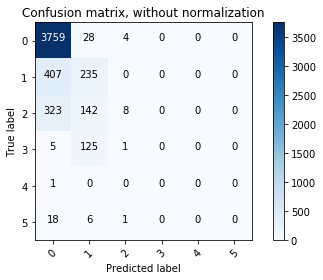

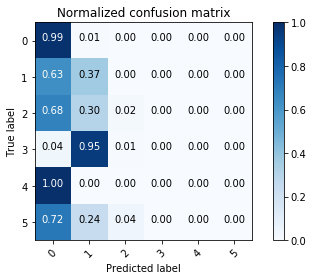

In [4]:
###############################################################################
###############################################################################
#************************BASELINE MODEL****************************************
###############################################################################
###############################################################################

#train with a logistic regression model adapted to multinomial classes:
# None of the solvers: 'newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ have done the convergency
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='saga',
                        multi_class='multinomial').fit(data_train, Ytrain)

#prediction
prediction=lr.predict(data_test)

print ("\n Classification report Baseline : \n",classification_report(Ytest,prediction))
print ("Accuracy Score Baseline : ",accuracy_score(Ytest,prediction))

cnf_matrix = confusion_matrix(Ytest,prediction)

cnf_matrix

#plot Confusion matrix with and without normalization
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names=[0,1,2,3,4,5]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# 3.4, 5 classe still can't be predicted

In [6]:
###############################################################################
#**********************KNN CLASSIFIER******************************************
###############################################################################
###############################################################################


from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


knn = neighbors.KNeighborsClassifier(weights='distance', algorithm='brute', leaf_size=30, p=1, metric='manhattan')


print('KNN score: %f' % knn.fit(data_train, Ytrain).score(data_test, Ytest))


# try K=1 through K=10 and record testing accuracy
k_range = range(1, 11)


scores = []

# use a loop through the range 1 to 26
# append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, Ytrain)
    y_predKnn = knn.predict(data_test)
    print ("\n Classification report KNN CLASSIFIER : \n",k,classification_report(Ytest,y_predKnn))
    print ("Accuracy Score KNN CLASSIFIER : ",k,accuracy_score(Ytest,y_predKnn))
    scores.append(metrics.accuracy_score(Ytest, y_predKnn))

print(scores)

probabknn = knn.predict_proba(data_test)

#confusion matrix
conf_matrix = confusion_matrix(Ytest, y_predKnn)
print(conf_matrix)


KNN score: 0.870038

 Classification report KNN CLASSIFIER : 
 1               precision    recall  f1-score   support

           0       0.91      0.90      0.90      3791
           1       0.53      0.69      0.60       642
           2       0.64      0.48      0.55       473
           3       0.63      0.44      0.52       131
           4       0.00      0.00      0.00         1
           5       0.20      0.24      0.22        25

    accuracy                           0.82      5063
   macro avg       0.49      0.46      0.46      5063
weighted avg       0.82      0.82      0.82      5063

Accuracy Score KNN CLASSIFIER :  1 0.8167094607939956

 Classification report KNN CLASSIFIER : 
 2               precision    recall  f1-score   support

           0       0.87      0.94      0.90      3791
           1       0.57      0.58      0.57       642
           2       0.66      0.34      0.45       473
           3       0.71      0.24      0.36       131
           4       0.0

In [7]:
###############################################################################
#*********************GAUSSIAN NAIVE BAYES************************************#
###############################################################################
###############################################################################

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1e-4)

#X_train_res, y_train_res.ravel()
gnb.fit(data_train,Ytrain)
y_predgnb = gnb.predict(data_test)


print ("\n Classification report Gaussian Naive Bayes: \n",classification_report(Ytest,y_predgnb))
print ("Accuracy Score Gaussian Naive Bayes: ",accuracy_score(Ytest,y_predgnb))


#confusion matrix
conf_matrix = confusion_matrix(Ytest, y_predgnb)
print(conf_matrix)


 Classification report Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      3791
           1       0.70      0.78      0.74       642
           2       0.59      0.27      0.37       473
           3       0.49      0.93      0.64       131
           4       0.00      0.00      0.00         1
           5       0.15      0.96      0.26        25

    accuracy                           0.84      5063
   macro avg       0.48      0.65      0.49      5063
weighted avg       0.87      0.84      0.85      5063

Accuracy Score Gaussian Naive Bayes:  0.8445585621173217
[[3498  168   78   19    3   25]
 [  38  502   11    1    4   86]
 [ 110   50  130  105   56   22]
 [   2    0    2  122    5    0]
 [   0    0    0    1    0    0]
 [   0    1    0    0    0   24]]


In [8]:
###############################################################################
#****************Support Vector Machine (SVM)**********************************
###############################################################################
###############################################################################


from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(data_train, Ytrain) 


predsvc = clf.predict(data_test)

print ('\n clasification report SVC:\n', classification_report(Ytest,predsvc))
print ("Accuracy Score SVM: ",accuracy_score(Ytest,predsvc))

print ('\n confusion matrix SVC:\n',confusion_matrix(Ytest, predsvc))


 clasification report SVC:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      3791
           1       0.62      0.68      0.64       642
           2       0.00      0.00      0.00       473
           3       0.00      0.00      0.00       131
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        25

    accuracy                           0.83      5063
   macro avg       0.25      0.28      0.26      5063
weighted avg       0.72      0.83      0.77      5063

Accuracy Score SVM:  0.8255974718546316

 confusion matrix SVC:
 [[3746   45    0    0    0    0]
 [ 208  434    0    0    0    0]
 [ 354  119    0    0    0    0]
 [  32   99    0    0    0    0]
 [   1    0    0    0    0    0]
 [  18    7    0    0    0    0]]


In [9]:
###############################################################################
#*************************Artificial Neural Network****************************
###############################################################################
###############################################################################

#ANN

from sklearn.neural_network import MLPClassifier
clfann = MLPClassifier(activation='logistic',solver='adam', alpha=1e-11,
                     hidden_layer_sizes=(50,), random_state=0)

clfann.fit(data_train, Ytrain)                         


pann = clfann.predict(data_test)

print ("\n Classification report ANN : \n",classification_report(Ytest,pann))
print ("Accuracy Score ANN : ",accuracy_score(Ytest,pann))

#confusion matrix
conf_matrix = confusion_matrix(Ytest, pann)
print(conf_matrix)


 Classification report ANN : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      3791
           1       0.67      0.68      0.68       642
           2       0.50      0.13      0.21       473
           3       0.00      0.00      0.00       131
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        25

    accuracy                           0.84      5063
   macro avg       0.34      0.30      0.30      5063
weighted avg       0.78      0.84      0.80      5063

Accuracy Score ANN :  0.8350780169859767
[[3729   56    6    0    0    0]
 [ 204  437    1    0    0    0]
 [ 319   92   62    0    0    0]
 [  19   59   53    0    0    0]
 [   1    0    0    0    0    0]
 [  16    8    1    0    0    0]]


In [ ]:
# Some of the ML algorithms had worst evaluation classification results with normalization
# next fase, implementation of SMOTE and grid search and tuning the hyper-parameters of an estimator